In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fd7e158b-3d29-4c7e-bf60-c0ba20d6701d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-02-12T00:40:13.431Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 8829}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10816, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df=pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.962522e+07,1.962522e+07,False,NaN,1,NaN,NaN,None,2024-02-12T00:39:00.000Z,48613.894695,2.040310e+10,25.6242,0.885058,1.804075,14.471590,13.427246,13.704426,33.542146,9.540586e+11,52.4811,1.020892e+12,None,2024-02-12T00:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
1,1027,Ethereum,ETH,ethereum,8397,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201706e+08,1.201706e+08,True,NaN,2,NaN,NaN,None,2024-02-12T00:39:00.000Z,2519.863414,7.518744e+09,17.0212,0.626684,0.740514,10.378397,-0.259959,11.645210,23.278439,3.028134e+11,16.6556,3.028134e+11,None,2024-02-12T00:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
2,825,Tether USDt,USDT,tether,74509,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.647514e+10,9.960063e+10,True,NaN,3,NaN,NaN,None,2024-02-12T00:37:00.000Z,1.000288,3.243574e+10,13.8345,-0.010465,-0.006778,0.053045,0.049245,0.009819,-0.010488,9.650288e+10,5.2978,9.962927e+10,None,2024-02-12T00:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-11 19:40:38.260232
3,1839,BNB,BNB,bnb,2060,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495453e+08,1.495453e+08,False,NaN,4,NaN,NaN,None,2024-02-12T00:38:00.000Z,321.760714,7.140556e+08,-1.6779,0.412017,-0.411073,5.424768,8.804580,27.579034,33.805407,4.811780e+10,2.6469,4.811780e+10,None,2024-02-12T00:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.373112e+08,5.693773e+08,True,NaN,5,NaN,NaN,None,2024-02-12T00:38:00.000Z,108.972586,1.402740e+09,-22.0856,1.430642,0.042496,14.137586,18.754503,55.550727,102.858126,4.765493e+10,2.6214,6.204651e+10,None,2024-02-12T00:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
5,52,XRP,XRP,xrp,1227,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.450697e+10,9.998791e+10,False,NaN,6,NaN,NaN,None,2024-02-12T00:39:00.000Z,0.528025,7.221227e+08,25.7402,0.402275,0.976372,4.972375,-7.676551,-15.619650,-20.455714,2.878104e+10,1.5832,5.280249e+10,None,2024-02-12T00:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
6,3408,USDC,USDC,usd-coin,16656,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.792807e+10,2.792807e+10,False,NaN,7,NaN,NaN,None,2024-02-12T00:38:00.000Z,0.999933,4.209823e+09,13.3038,-0.014569,-0.017196,-0.039163,-0.015689,-0.034425,-0.007203,2.792620e+10,1.5362,2.792620e+10,None,2024-02-12T00:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-11 19:40:38.260232
7,2010,Cardano,ADA,cardano,1068,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.544220e+10,3.661393e+10,False,NaN,8,NaN,NaN,None,2024-02-12T00:37:00.000Z,0.545459,5.242812e+08,33.7150,0.741092,-0.876531,10.697159,-0.386763,-17.138652,54.041281,1.933225e+10,1.0634,2.454563e+10,None,2024-02-12T00:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
8,5805,Avalanche,AVAX,avalanche,661,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",

In [6]:
def api_runner():
    global df
    #This example uses Python 2.7 and the python-request library.

    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fd7e158b-3d29-4c7e-bf60-c0ba20d6701d',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp.now()
    df = pd.concat([df, df2], ignore_index=False)
    
    
   # if not os.path.isfile(r"C:\Users\dell\Desktop\python_course\API.csv"):
    #    df.to_csv(r"C:\Users\dell\Desktop\python_course\API.csv",header='columns_names')
    #else:
     #   df.to_csv(r"C:\Users\dell\Desktop\python_course\API.csv",mode='a',header=False)

        #so that we dont need a header for every append function



In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("Running succesfully")
    sleep(60)
exit()

Running succesfully
Running succesfully
Running succesfully
Running succesfully
Running succesfully


KeyboardInterrupt: 

In [ ]:
#df3= pd.read_csv(r"C:\Users\dell\Desktop\python_course\API.csv")
#df3

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19625225.00000,19625225.00000,False,NaN,1,NaN,NaN,None,2024-02-12T00:39:00.000Z,48613.89469,20403104755.26764,25.62420,0.88506,1.80407,14.47159,13.42725,13.70443,33.54215,954058621511.51819,52.48110,1020891788590.55005,None,2024-02-12T00:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
1,1027,Ethereum,ETH,ethereum,8397,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120170576.77787,120170576.77787,True,NaN,2,NaN,NaN,None,2024-02-12T00:39:00.000Z,2519.86341,7518744391.00022,17.02120,0.62668,0.74051,10.37840,-0.25996,11.64521,23.27844,302813439874.63416,16.65560,302813439874.63000,None,2024-02-12T00:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
2,825,Tether USDt,USDT,tether,74509,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96475135177.57817,99600626148.96388,True,NaN,3,NaN,NaN,None,2024-02-12T00:37:00.000Z,1.00029,32435737260.24086,13.83450,-0.01047,-0.00678,0.05305,0.04925,0.00982,-0.01049,96502882320.80711,5.29780,99629272212.37000,None,2024-02-12T00:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-11 19:40:38.260232
3,1839,BNB,BNB,bnb,2060,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149545307.63872,149545307.63872,False,NaN,4,NaN,NaN,None,2024-02-12T00:38:00.000Z,321.76071,714055641.53488,-1.67790,0.41202,-0.41107,5.42477,8.80458,27.57903,33.80541,48117804941.30754,2.64690,48117804941.31000,None,2024-02-12T00:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,437311211.97886,569377279.40064,True,NaN,5,NaN,NaN,None,2024-02-12T00:38:00.000Z,108.97259,1402739836.47023,-22.08560,1.43064,0.04250,14.13759,18.75450,55.55073,102.85813,47654933459.86974,2.62140,62046514290.40000,None,2024-02-12T00:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:40:38.260232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,74,Dogecoin,DOGE,dogecoin,888,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143034946383.70526,143034946383.70526,True,NaN,11,NaN,NaN,None,2024-02-12T00:43:00.000Z,0.08141,312199236.82204,48.66800,0.35035,-0.06634,4.18088,1.54555,-15.07659,10.26680,11645040039.59260,0.64070,11645040039.59000,None,2024-02-12T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:44:42.791382
11,1958,TRON,TRX,tron,929,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,88081742402.60112,88081744867.43074,True,NaN,12,71659659264.00000,8911044526.68701,None,2024-02-12T00:42:00.000Z,0.12435,181867422.25001,-0.84060,0.06464,-0.10540,5.05806,16.55534,19.25186,16.93887,10953168583.26269,0.60280,10953168889.77000,None,2024-02-12T00:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-11 19:44:42.791382
12,6636,Polkadot,DOT,polkadot-new,682,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1277958830.82044,1410219332.52879,True,NaN,13,NaN,NaN,None,2024-02-12T00:42:00.000Z,7.13850,172026361.80429,15.75180,0.60014,-0.64332,7.34249,-5.

In [30]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.88080,1.79177,14.53118,13.42502,13.71278,33.59415
Ethereum,0.59658,0.68933,10.38733,-0.31034,11.62837,23.37198
Tether USDt,-0.01627,-0.02029,0.03702,0.03705,-0.01096,-0.00599
BNB,0.39192,-0.44076,5.40002,8.76708,27.58967,33.87198
Solana,1.40922,-0.02248,14.16046,18.73976,55.67793,103.51183
XRP,0.39680,0.91824,4.99158,-7.70329,-15.56885,-20.41593
USDC,-0.01037,-0.01907,-0.02773,-0.02117,-0.02781,-0.00676
Cardano,0.70854,-1.09399,10.65522,-0.44944,-17.03217,54.12663
Avalanche,0.82621,-0.68172,15.22357,12.22456,3.78494,147.86949


In [11]:
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.88080,1.79177,14.53118,13.42502,13.71278,33.59415
Ethereum,0.59658,0.68933,10.38733,-0.31034,11.62837,23.37198
Tether USDt,-0.01627,-0.02029,0.03702,0.03705,-0.01096,-0.00599
BNB,0.39192,-0.44076,5.40002,8.76708,27.58967,33.87198
Solana,1.40922,-0.02248,14.16046,18.73976,55.67793,103.51183
XRP,0.39680,0.91824,4.99158,-7.70329,-15.56885,-20.41593
USDC,-0.01037,-0.01907,-0.02773,-0.02117,-0.02781,-0.00676
Cardano,0.70854,-1.09399,10.65522,-0.44944,-17.03217,54.12663
Avalanche,0.82621,-0.68172,15.22357,12.22456,3.78494,147.86949


In [12]:
df10=df4.stack()
df10

name                                 
Bitcoin  quote.USD.percent_change_1h      0.88080
         quote.USD.percent_change_24h     1.79177
         quote.USD.percent_change_7d     14.53118
         quote.USD.percent_change_30d    13.42502
         quote.USD.percent_change_60d    13.71278
                                           ...   
Toncoin  quote.USD.percent_change_24h     0.75625
         quote.USD.percent_change_7d      2.53638
         quote.USD.percent_change_30d    -1.55850
         quote.USD.percent_change_60d    -4.39193
         quote.USD.percent_change_90d   -10.89507
Length: 90, dtype: float64

In [13]:
df11=df10.to_frame(name='values')

In [14]:
df11

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.88080
        quote.USD.percent_change_24h   1.79177
        quote.USD.percent_change_7d   14.53118
        quote.USD.percent_change_30d  13.42502
        quote.USD.percent_change_60d  13.71278
...                                        ...
Toncoin quote.USD.percent_change_24h   0.75625
        quote.USD.percent_change_7d    2.53638
        quote.USD.percent_change_30d  -1.55850
        quote.USD.percent_change_60d  -4.39193
        quote.USD.percent_change_90d -10.89507

[90 rows x 1 columns]

In [15]:
df11=df11.reset_index()

In [16]:
df12=df11.rename(columns={'level_1': 'percent_change'})
df12

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.88080
1,Bitcoin,quote.USD.percent_change_24h,1.79177
2,Bitcoin,quote.USD.percent_change_7d,14.53118
3,Bitcoin,quote.USD.percent_change_30d,13.42502
4,Bitcoin,quote.USD.percent_change_60d,13.71278
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,0.75625
86,Toncoin,quote.USD.percent_change_7d,2.53638
87,Toncoin,quote.USD.percent_change_30d,-1.55850
88,Toncoin,quote.USD.percent_change_60d,-4.39193


In [17]:
df12['percent_change'] = df12['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24h','7d','30d','60d','90d'])
df12

,name,percent_change,values
0,Bitcoin,1hr,0.88080
1,Bitcoin,24h,1.79177
2,Bitcoin,7d,14.53118
3,Bitcoin,30d,13.42502
4,Bitcoin,60d,13.71278
...,...,...,...
85,Toncoin,24h,0.75625
86,Toncoin,7d,2.53638
87,Toncoin,30d,-1.55850
88,Toncoin,60d,-4.39193


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
df15 = df[['name','quote.USD.price','timestamp']]
df15 = df15.query("name == 'Bitcoin'")
df15= df15.reset_index()
df15

,index,name,quote.USD.price,timestamp
0,0,Bitcoin,48613.89469,2024-02-11 19:40:38.260232
1,0,Bitcoin,48613.89469,2024-02-11 19:40:41.916355
2,0,Bitcoin,48613.89469,2024-02-11 19:41:42.124687
3,0,Bitcoin,48587.09183,2024-02-11 19:42:42.342794
4,0,Bitcoin,48609.89496,2024-02-11 19:43:42.572040
5,0,Bitcoin,48607.79812,2024-02-11 19:44:42.791382


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

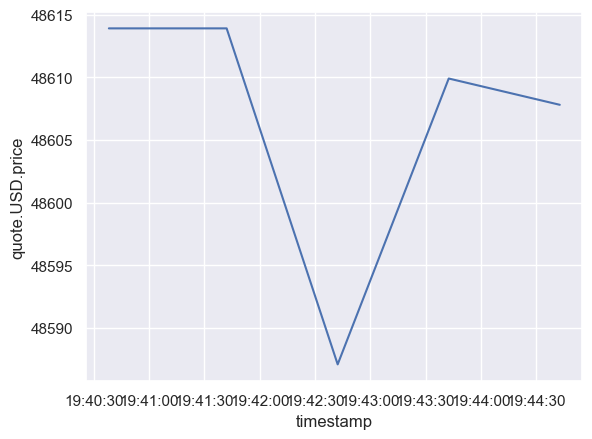

In [20]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df15)

In [21]:
print(df15.index.duplicated().any())


False


In [22]:
df15

,index,name,quote.USD.price,timestamp
0,0,Bitcoin,48613.89469,2024-02-11 19:40:38.260232
1,0,Bitcoin,48613.89469,2024-02-11 19:40:41.916355
2,0,Bitcoin,48613.89469,2024-02-11 19:41:42.124687
3,0,Bitcoin,48587.09183,2024-02-11 19:42:42.342794
4,0,Bitcoin,48609.89496,2024-02-11 19:43:42.572040
5,0,Bitcoin,48607.79812,2024-02-11 19:44:42.791382


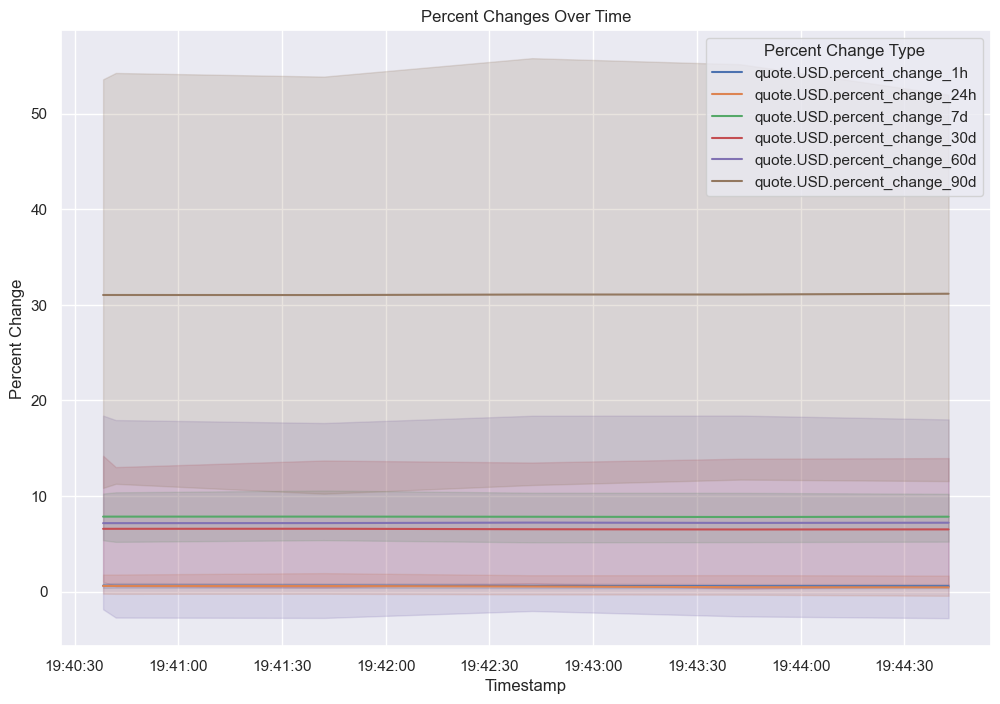

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.set_theme(style="darkgrid")

percent_change_cols = ['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
                        'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']

# Melt the DataFrame to long format for Seaborn
df_melted = df.melt(id_vars=['timestamp'], value_vars=percent_change_cols, var_name='Percent Change Type', value_name='Percent Change')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(x='timestamp', y='Percent Change', hue='Percent Change Type', data=df_melted)
plt.title('Percent Changes Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Percent Change')
plt.legend(title='Percent Change Type')
plt.show()


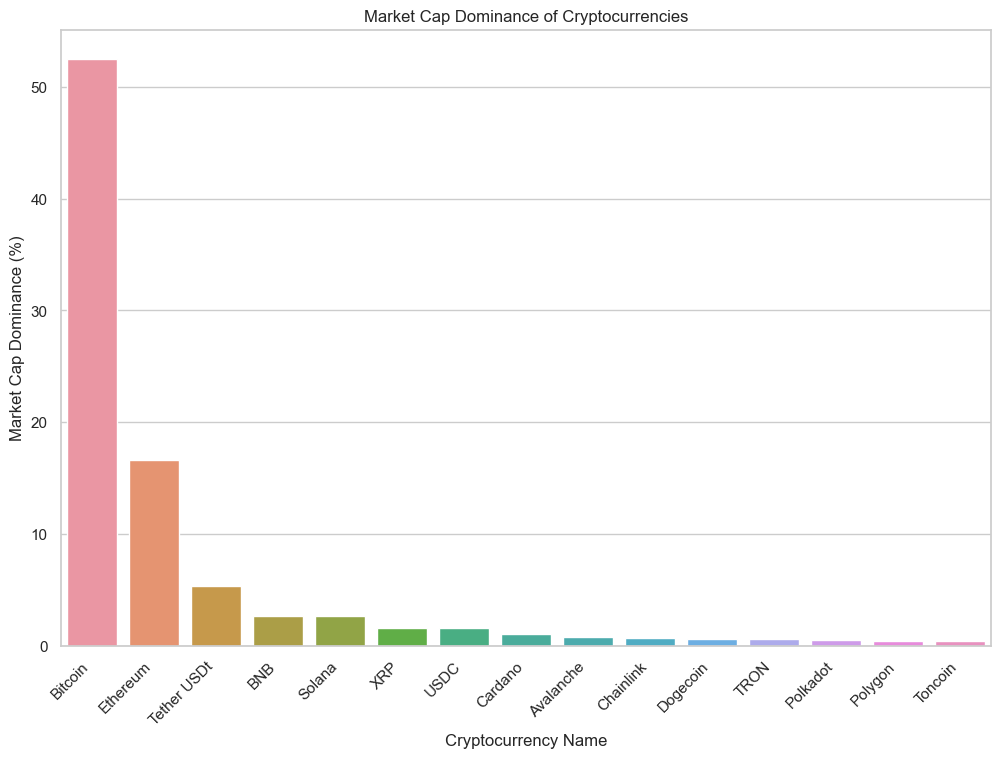

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='quote.USD.market_cap_dominance', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Market Cap Dominance of Cryptocurrencies')
plt.xlabel('Cryptocurrency Name')
plt.ylabel('Market Cap Dominance (%)')
plt.show()
